In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset descargado de https://climate.cityofnewyork.us/initiatives/nyc-greenhouse-gas-inventories/
df = pd.read_excel('../Datasets\CY_2005_CY_2022_citywide.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 84 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cleaning Flags                        55 non-null     float64
 1   Clean Flag Desc                       56 non-null     object 
 2   Sectors Sector                        56 non-null     object 
 3   Category Full                         56 non-null     object 
 4   Category Label                        56 non-null     object 
 5   Source Full                           56 non-null     object 
 6   Source Label                          56 non-null     object 
 7   Source Units                          56 non-null     object 
 8   CY 2005 Consumed                      56 non-null     float64
 9   CY 2005 tCO2e                         56 non-null     float64
 10  CY 2005 Source MMBtu                  56 non-null     float64
 11  CY 2005 tCO2e 20 yr G

In [3]:
df.head()

,Cleaning Flags,Clean Flag Desc,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2005 Consumed,CY 2005 tCO2e,...,CY 2021 Source MMBtu,CY 2021 tCO2e 20 yr GWP,CY 2022 Consumed,CY 2022 tCO2e,CY 2022 Source MMBtu,CY 2022 tCO2e 20 yr GWP,2005 - 2022 % change Consumed,2005 - 2022 % change tCO2e,2005 - 2022 % change Source MMBtu,2005 - 2022 % change tCO2e 20 yr GWP
0,1.0,General,Stationary Energy,Residential (small and large residential),Residential,#2 fuel oil,#2 fuel oil,gallon,1.466460e+08,1517199.47,...,1.316496e+07,998897.39,1.059489e+08,1096146.81,1.476715e+07,1120464.19,-27.751965,-27.751965,-27.751965,-27.751965
1,1.0,General,Stationary Energy,Residential (small and large residential),Residential,#4 fuel oil,#4 fuel oil,gallon,7.786078e+07,856170.38,...,6.464253e+06,483118.96,4.054991e+07,445893.70,5.979490e+06,446889.20,-47.919980,-47.919981,-47.919980,-47.919981
2,1.0,General,Stationary Energy,Residential (small and large residential),Residential,#6 fuel oil,#6 fuel oil,gallon,1.938461e+08,2191711.04,...,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.00,-100.000000,-100.000000,-100.000000,-100.000000
3,1.0,General,Stationary Energy,Residential (small and large residential),Residential,Biofuel,Biofuel,gallon,7.194951e+05,4.73,...,1.559419e+06,173.70,1.252900e+07,82.32,1.619750e+06,180.42,1641.360775,1640.380550,1641.360828,1641.505792
4,1.0,General,Stationary Energy,Residential (small and large residential),Residential,Electricity,Electricity,kWh,1.416836e+10,7058136.66,...,1.272241e+08,4806199.89,1.448722e+10,4681763.73,1.260475e+08,4686785.01,2.250501,-33.668559,2.250501,-33.694594


In [4]:
df['Sectors Sector'].unique()

array(['Stationary Energy', 'Transportation', 'Waste', 'Total'],
      dtype=object)

In [5]:
df = df[df['Sectors Sector'] == 'Transportation']
df. head()

,Cleaning Flags,Clean Flag Desc,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2005 Consumed,CY 2005 tCO2e,...,CY 2021 Source MMBtu,CY 2021 tCO2e 20 yr GWP,CY 2022 Consumed,CY 2022 tCO2e,CY 2022 Source MMBtu,CY 2022 tCO2e 20 yr GWP,2005 - 2022 % change Consumed,2005 - 2022 % change tCO2e,2005 - 2022 % change Source MMBtu,2005 - 2022 % change tCO2e 20 yr GWP
34,1.0,General,Transportation,Railways,Railways,Electricity - subway and commuter rail,Electricity,kWh,2.223042e+09,1107434.24,...,17335556.13,654892.83,2.133596e+09,689503.64,18563567.77,690243.15,-4.023561,-37.738638,-4.023561,-37.763075
35,1.0,General,Transportation,Railways,Railways,Diesel - commuter rail,Diesel,gallon,1.375601e+06,14214.94,...,206313.68,15331.93,1.607895e+06,16615.37,224108.35,16654.31,16.886671,16.886670,16.886673,16.886623
36,3.0,General Leakage,Transportation,Railways,Railways,Upstream Electricity,Upstream Electricity,kWh,2.223042e+09,0.00,...,17335556.13,508041.79,2.133596e+09,0.00,18563567.77,535680.10,-4.023561,0.000000,-4.023561,-25.525227
37,1.0,General,Transportation,Marine Navigation,Marine Navigation,Diesel - marine navigation,Marine diesel,gallon,4.820480e+06,49897.65,...,1247176.97,92773.57,8.988192e+06,93038.39,1252774.20,93189.93,86.458459,86.458460,86.458458,86.458434
38,1.0,General,Transportation,Marine Navigation,Marine Navigation,Biofuel,Biofuel,gallon,0.000000e+00,0.00,...,0.01,0.00,0.000000e+00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000


In [6]:
df['Category Full'].unique()

array(['Railways', 'Marine Navigation', 'Aviation', 'On-Road'],
      dtype=object)

In [7]:
df = df[df['Category Full'] == 'On-Road']
df.head()

,Cleaning Flags,Clean Flag Desc,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2005 Consumed,CY 2005 tCO2e,...,CY 2021 Source MMBtu,CY 2021 tCO2e 20 yr GWP,CY 2022 Consumed,CY 2022 tCO2e,CY 2022 Source MMBtu,CY 2022 tCO2e 20 yr GWP,2005 - 2022 % change Consumed,2005 - 2022 % change tCO2e,2005 - 2022 % change Source MMBtu,2005 - 2022 % change tCO2e 20 yr GWP
44,0.0,Vehicle Type Transpo,Transportation,On-Road,On-Road,Passenger cars,Passenger cars,VMT,1.931805e+10,12860259.43,...,1.833035e+08,12063351.28,2.132359e+10,12652887.64,1.917805e+08,12661821.59,10.381692,-1.612501,-0.524489,-1.664287
45,0.0,Vehicle Type Transpo,Transportation,On-Road,On-Road,Medium duty trucks,Medium duty trucks,VMT,4.876286e+08,387163.75,...,6.021581e+06,400236.21,5.926221e+08,423766.30,6.415127e+06,424248.75,21.531449,9.454023,13.122237,9.427790
46,0.0,Vehicle Type Transpo,Transportation,On-Road,On-Road,Heavy duty trucks,Heavy duty trucks,VMT,5.936931e+08,1354258.26,...,2.030077e+07,1465566.62,6.716935e+08,1516471.88,2.112551e+07,1520006.99,13.138167,11.978042,12.184616,12.225072
47,0.0,Vehicle Type Transpo,Transportation,On-Road,On-Road,SWCV,SWCV,VMT,3.860099e+07,65624.51,...,9.835581e+05,68352.59,4.089437e+07,68337.04,9.862826e+05,68481.15,5.941253,4.133410,4.729240,4.345296
48,0.0,Vehicle Type Transpo,Transportation,On-Road,On-Road,School Bus,School Bus,VMT,5.130902e+07,47222.09,...,6.369809e+05,63756.32,7.786782e+07,63430.21,6.382694e+05,63526.83,51.762427,34.323174,-1.948519,34.486600


In [8]:
df['Source Full'].unique()

array(['Passenger cars', 'Medium duty trucks', 'Heavy duty trucks',
       'SWCV', 'School Bus', 'Bus'], dtype=object)

SWCV (Small Waste Collection Vehicles - Vehículos de Pequeña Recolección de Residuos)

Solamente nos interesan las emisiones de Passenger cars, por lo tanto filtramos nuevamente el dataframe

In [9]:
df = df[df['Source Full'] == 'Passenger cars']

Ahora vamos a seleccionar las columnas de interés: las emisiones en toneladas de CO2 para cada año disponible.

Aclaración: <br>
- 'CY XXXX Consumed' corresponde a las "VMT" ("Vehicle Miles Traveled" = "Millas Recorridas por Vehículo"). Es una medida utilizada para cuantificar la cantidad total de millas que se han recorrido por vehículos en un área determinada (NYC) durante un período de tiempo específico (Año XXXX). <br>
- 'CY XXXX tCO2e' corresponde a las toneladas de CO2 emitidas en NYC durante el año XXXX. <br>
- 'CY XXXX Source MMBtu' Esta columna se refiere a los millones de unidades térmicas británicas (MMBtu) consumidas por la fuente en el año XXXX. El MMBtu es una medida de energía y es comúnmente utilizada para medir la cantidad de energía que se consume.
- CY XXXX tCO2e 20 yr GWP: Esta columna indica las emisiones de CO2 equivalente (tCO2e) para el año XXXX, calculadas utilizando un Potencial de Calentamiento Global (GWP, por sus siglas en inglés) de 20 años. El GWP es una medida que compara el potencial de calentamiento global de un gas en particular con el dióxido de carbono (CO2) durante un período de tiempo específico (en este caso, 20 años).


Por lo tanto, solo nos interesan las columnas 'CY XXXX tCO2e' y las millas recorridas 'CY XXXX Consumed'

In [10]:
df.columns

Index(['Cleaning Flags', 'Clean Flag Desc', 'Sectors Sector', 'Category Full',
       'Category Label', 'Source Full', 'Source Label', 'Source Units',
       'CY 2005 Consumed', 'CY 2005 tCO2e', 'CY 2005 Source MMBtu',
       'CY 2005 tCO2e 20 yr GWP', 'CY 2006 Consumed', 'CY 2006 tCO2e',
       'CY 2006 Source MMBtu', 'CY 2006 tCO2e 20 yr GWP', 'CY 2007 Consumed',
       'CY 2007 tCO2e', 'CY 2007 Source MMBtu', 'CY 2007 tCO2e 20 yr GWP',
       'CY 2008 Consumed', 'CY 2008 tCO2e', 'CY 2008 Source MMBtu',
       'CY 2008 tCO2e 20 yr GWP', 'CY 2009 Consumed', 'CY 2009 tCO2e',
       'CY 2009 Source MMBtu', 'CY 2009 tCO2e 20 yr GWP', 'CY 2010 Consumed',
       'CY 2010 tCO2e', 'CY 2010 Source MMBtu', 'CY 2010 tCO2e 20 yr GWP',
       'CY 2011 Consumed', 'CY 2011 tCO2e', 'CY 2011 Source MMBtu',
       'CY 2011 tCO2e 20 yr GWP', 'CY 2012 Consumed', 'CY 2012 tCO2e',
       'CY 2012 Source MMBtu', 'CY 2012 tCO2e 20 yr GWP', 'CY 2013 Consumed',
       'CY 2013 tCO2e', 'CY 2013 Source MMBtu', 

In [11]:
columnas_emisiones = ['CY 2005 tCO2e', 'CY 2006 tCO2e', 'CY 2007 tCO2e', 'CY 2008 tCO2e', 'CY 2009 tCO2e', 'CY 2010 tCO2e', 'CY 2011 tCO2e', 
            'CY 2012 tCO2e', 'CY 2013 tCO2e', 'CY 2014 tCO2e', 'CY 2015 tCO2e', 'CY 2016 tCO2e', 'CY 2017 tCO2e', 'CY 2018 tCO2e', 
            'CY 2019 tCO2e', 'CY 2020 tCO2e', 'CY 2021 tCO2e', 'CY 2022 tCO2e']
columnas_millas = ['CY 2005 Consumed', 'CY 2006 Consumed', 'CY 2007 Consumed','CY 2008 Consumed', 'CY 2009 Consumed', 'CY 2010 Consumed',
             'CY 2011 Consumed', 'CY 2012 Consumed', 'CY 2013 Consumed','CY 2014 Consumed', 'CY 2015 Consumed', 'CY 2016 Consumed',
             'CY 2017 Consumed', 'CY 2018 Consumed', 'CY 2019 Consumed','CY 2020 Consumed', 'CY 2021 Consumed', 'CY 2022 Consumed']
            
df_emisiones = df[columnas_emisiones]
nuevos_nombres = [col.split()[1] for col in columnas_emisiones]
df_emisiones.columns = nuevos_nombres
df_emisiones.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
44,12860259.43,12828084.43,12786857.22,12297498.3,12087651.48,12619175.98,12202449.45,11972767.4,11931734.6,11844931.68,12157010.71,12437484.31,12484566.31,12805237.63,12997213.55,9961821.7,12054820.41,12652887.64
49,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


Por último, eliminemos la fila con indice 49 que corresponde a las pérdidas (leakage) y tiene todos valores 0.

In [12]:
df_emisiones = df_emisiones.loc[44,:]

In [13]:
df_millas = df[columnas_millas]
nuevos_nombres = [col.split()[1] for col in columnas_millas]
df_millas.columns = nuevos_nombres
df_millas.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
44,1.931805e+10,1.940687e+10,1.948293e+10,1.887690e+10,1.869101e+10,1.965703e+10,1.914939e+10,1.892978e+10,1.900734e+10,1.901265e+10,1.966289e+10,2.024433e+10,2.043934e+10,2.108075e+10,2.152393e+10,1.659313e+10,2.018821e+10,2.132359e+10
49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [14]:
df_millas = df_millas.loc[44,:]

Grafiquemos ahora la evolución anual de emisiones de CO2 en New York City desde 2005 hasta 2022, por parte de los vehículos con pasajeros.

In [15]:
df_emisiones.rename('Emisiones CO_2', inplace=True)

2005    12860259.43
2006    12828084.43
2007    12786857.22
2008    12297498.30
2009    12087651.48
2010    12619175.98
2011    12202449.45
2012    11972767.40
2013    11931734.60
2014    11844931.68
2015    12157010.71
2016    12437484.31
2017    12484566.31
2018    12805237.63
2019    12997213.55
2020     9961821.70
2021    12054820.41
2022    12652887.64
Name: Emisiones CO_2, dtype: float64

In [16]:
df_millas.rename('Millas recorridas', inplace=True)

2005    1.931805e+10
2006    1.940687e+10
2007    1.948293e+10
2008    1.887690e+10
2009    1.869101e+10
2010    1.965703e+10
2011    1.914939e+10
2012    1.892978e+10
2013    1.900734e+10
2014    1.901265e+10
2015    1.966289e+10
2016    2.024433e+10
2017    2.043934e+10
2018    2.108075e+10
2019    2.152393e+10
2020    1.659313e+10
2021    2.018821e+10
2022    2.132359e+10
Name: Millas recorridas, dtype: float64

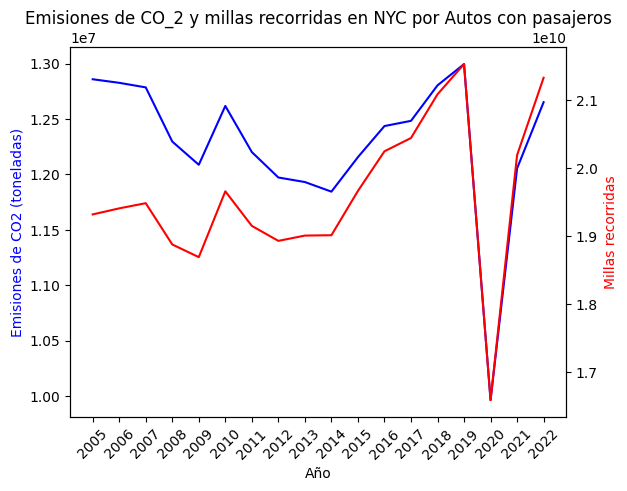

In [17]:
fig, ax1 = plt.subplots()

# Trazar el primer conjunto de datos (emisiones de CO2)
sns.lineplot(data=df_emisiones, ax=ax1, color='b')
ax1.set_xlabel('Año')
ax1.set_ylabel('Emisiones de CO2 (toneladas)', color='b')

# Crear el segundo eje y
ax2 = ax1.twinx()

# Trazar el segundo conjunto de datos (millas recorridas)
sns.lineplot(data=df_millas, ax=ax2, color='r')
ax2.set_ylabel('Millas recorridas', color='r')

# Ajustar las etiquetas de los ejes
plt.title('Emisiones de CO_2 y millas recorridas en NYC por Autos con pasajeros')
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
# Mostrar el gráfico
plt.show()

In [20]:
df_final = pd.DataFrame({'Emisiones': df_emisiones, 'Millas_recorridas': df_millas}).reset_index()
df_final.rename(columns={'index': 'Año'}, inplace=True)
df_final.head()

,Año,Emisiones,Millas_recorridas
0,2005,12860259.43,1.931805e+10
1,2006,12828084.43,1.940687e+10
2,2007,12786857.22,1.948293e+10
3,2008,12297498.30,1.887690e+10
4,2009,12087651.48,1.869101e+10


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                18 non-null     object 
 1   Emisiones          18 non-null     float64
 2   Millas_recorridas  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 564.0+ bytes
